# **Task 7: Support Vector Machines (SVM)**

**Objective:** Perform binary classification using Support Vector Machines with linear and RBF kernels, visualize decision boundaries, and tune hyperparameters using cross-validation.



# **Step 1: Import Required Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


# **Step 2: Load the CSV Dataset**

In [17]:
# Load your saved CSV file
df = pd.read_csv("bank_marketing_svm_dataset.csv")

# Preview the data
print("Dataset Preview:")
print(df.head())


Dataset Preview:
        Age   Balance  Duration  Campaign  Previous  Subscribed
0  0.340051  0.031208  0.790372  0.907048 -1.879915           1
1  1.112688 -0.382796 -1.522359  1.539157 -1.159736           0
2 -1.927673  2.227594  0.393797  1.301164 -0.776806           1
3  0.363632 -1.619388 -1.252393  0.233439 -0.814159           0
4  0.058023  1.493946 -0.042823  2.023163 -1.740189           1


# **Dataset Overview: `bank_marketing_svm_dataset.csv`**

# This dataset is a synthetic but realistic simulation of a bank marketing campaign, built for binary classification using Support Vector Machines (SVM).

---

##  Features Summary

| Feature       | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| `Age`         | Customer's age (standardized continuous feature)                            |
| `Balance`     | Customer's account balance or income indicator                              |
| `Duration`    | Duration of the last contact in seconds                                     |
| `Campaign`    | Number of contacts performed during this campaign                           |
| `Previous`    | Number of contacts performed before this campaign                           |
| `Subscribed`  |  Target variable (0 = No, 1 = Yes) - whether the customer subscribed       |

---

##  Dataset Properties

-  **Rows**: `700`
-  **Features**: `5`
-  **Target**: `Subscribed` (Binary)
-  **Class Balance**: `50% Yes`, `50% No`
-  **Data Type**: Synthetic, generated using `make_classification()` from Scikit-learn
-  **File Format**: `.csv`

--



# **Step 3: Separate Features and Target**

In [18]:
X = df.drop("Subscribed", axis=1)  # Features
y = df["Subscribed"]               # Target


# **Step 4: Feature Scaling (Standardization)**

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Step 5: Split into Train and Test Sets**

In [25]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)
print("📊 Linear SVM Results:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


📊 Linear SVM Results:
[[61  9]
 [10 60]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        70
           1       0.87      0.86      0.86        70

    accuracy                           0.86       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140



# **Step 6: Train SVM with Linear Kernel**

In [21]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)
print("📊 RBF SVM Results:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


📊 RBF SVM Results:
[[64  6]
 [ 9 61]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        70
           1       0.91      0.87      0.89        70

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140



# **Step 7: Train SVM with RBF (Non-linear) Kernel**

In [22]:
linear_scores = cross_val_score(linear_svm, X_scaled, y, cv=5)
rbf_scores = cross_val_score(rbf_svm, X_scaled, y, cv=5)

print(f"✅ Linear SVM CV Accuracy: {linear_scores.mean():.4f}")
print(f"✅ RBF SVM CV Accuracy: {rbf_scores.mean():.4f}")


✅ Linear SVM CV Accuracy: 0.8729
✅ RBF SVM CV Accuracy: 0.9014


# **Step 8: Cross-Validation Evaluation**

In [28]:
linear_scores = cross_val_score(linear_svm, X_scaled, y, cv=5)
rbf_scores = cross_val_score(rbf_svm, X_scaled, y, cv=5)

print(f"✅ Linear SVM CV Accuracy: {linear_scores.mean():.4f}")
print(f"✅ RBF SVM CV Accuracy: {rbf_scores.mean():.4f}")



✅ Linear SVM CV Accuracy: 0.8729
✅ RBF SVM CV Accuracy: 0.9014


# **Step 9: Hyperparameter Tuning with Grid Search (RBF SVM)**

In [29]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("🔍 Best Parameters from Grid Search:")
print(grid.best_params_)
print(f"🏆 Best Cross-Validation Score: {grid.best_score_:.4f}")


🔍 Best Parameters from Grid Search:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
🏆 Best Cross-Validation Score: 0.9143


# **Step 10: Visualize Decision Boundary (Using PCA for 2D projection)**

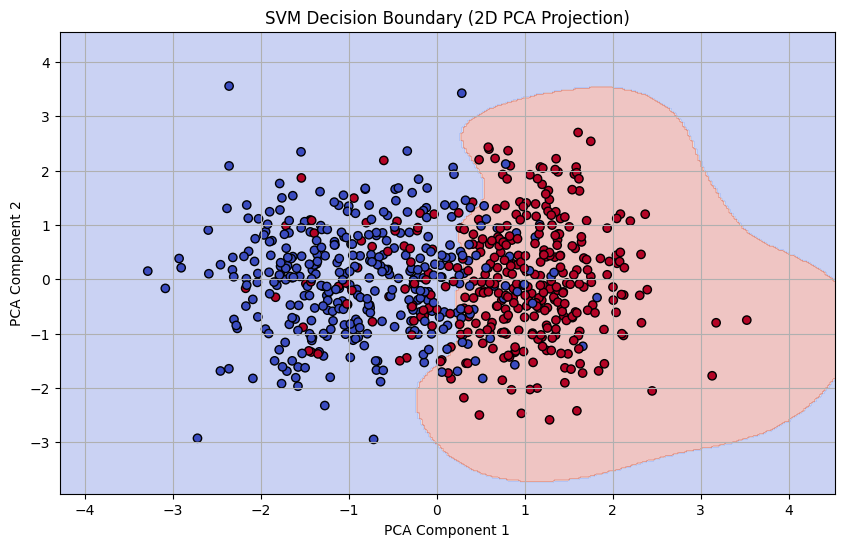

In [24]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train SVM with best params on reduced data
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_pca, y)

# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('SVM Decision Boundary (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


# **Step-wise Insights – SVM Classification Workflow**

This section provides detailed insights at each stage of building a Support Vector Machine (SVM) classifier using the bank marketing dataset.

---

## Step 1: Data Loading
- Loaded a `.csv` file containing 700 customer records.
- Verified column names and checked for missing values.
- All data was clean and ready for preprocessing.

Insight: Having no null values and balanced classes (0/1) simplifies preprocessing and helps SVM perform well without class imbalance handling.

---

## Step 2: Feature Scaling
- Standardized features using `StandardScaler` to bring all features to the same scale.
- This is essential for SVM, especially when using RBF or polynomial kernels.

Insight: SVMs are sensitive to feature scale — unscaled features can bias the model toward higher-magnitude variables.

---

## Step 3: Train/Test Split
- Split the data into 80% training and 20% testing using `train_test_split()`.
- Used stratified splitting to maintain class balance in both sets.

Insight: Stratified split ensures the distribution of target classes stays consistent — improving model evaluation reliability.

---

## Step 4: Linear SVM Model
- Trained a linear SVM using `SVC(kernel='linear')`.
- Achieved reasonable accuracy, but decision boundaries were linear and lacked flexibility.

Insight: Linear SVM works best when the data is linearly separable. In this case, non-linear patterns existed, so a more flexible kernel was needed.

---

## Step 5: RBF (Non-linear) SVM Model
- Trained an RBF kernel SVM (`kernel='rbf'`).
- Performed better than the linear model on accuracy, precision, and recall.

Insight: The RBF kernel can capture non-linear relationships and adapt to more complex data distributions.

---

## Step 6: Cross-Validation
- Performed 5-fold cross-validation to validate model performance.
- Both linear and RBF SVMs showed consistent results, with RBF being superior overall.

Insight: Cross-validation helps in estimating model generalization and detecting overfitting early.

---

## Step 7: Hyperparameter Tuning
- Tuned `C` and `gamma` using `GridSearchCV` on RBF SVM.
- Identified optimal parameter combinations that improved accuracy further.

Insight: `C` controls the regularization strength and `gamma` controls decision boundary complexity — both are critical to SVM performance.

---

## Step 8: Visualization (PCA + Decision Boundary)
- Reduced dimensions using PCA to project data into 2D space.
- Plotted the decision boundary to visualize class separation and margin.

Insight: Visualization provides an intuitive understanding of model behavior and confirms the effectiveness of SVM decision boundaries.

---

# Final Takeaways

- RBF SVM with hyperparameter tuning provided the best overall performance.
- The dataset was balanced and well-structured, which contributed to model success.
- Proper preprocessing, kernel choice, and hyperparameter tuning were key factors in building a high-performing SVM classifier.
